[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current Stock Price: 225.6699981689453
Historical Volatility: 0.21904652351835566
Black-Scholes call price: 18.47859853635262
Monte Carlo call price: 18.422309319928743
Binomial Tree call price: 18.478232162785574
Greeks: Delta=0.9911330190956097, Gamma=0.0029321909183500894, Vega=0.8961555432491307, Theta=-13.841989955524507, Rho=5.621654467620132
Newton-Raphson method converged! sigma = 0.7393821669209875
implied volatility =  0.7393821669209875
Report saved to options_report.txt


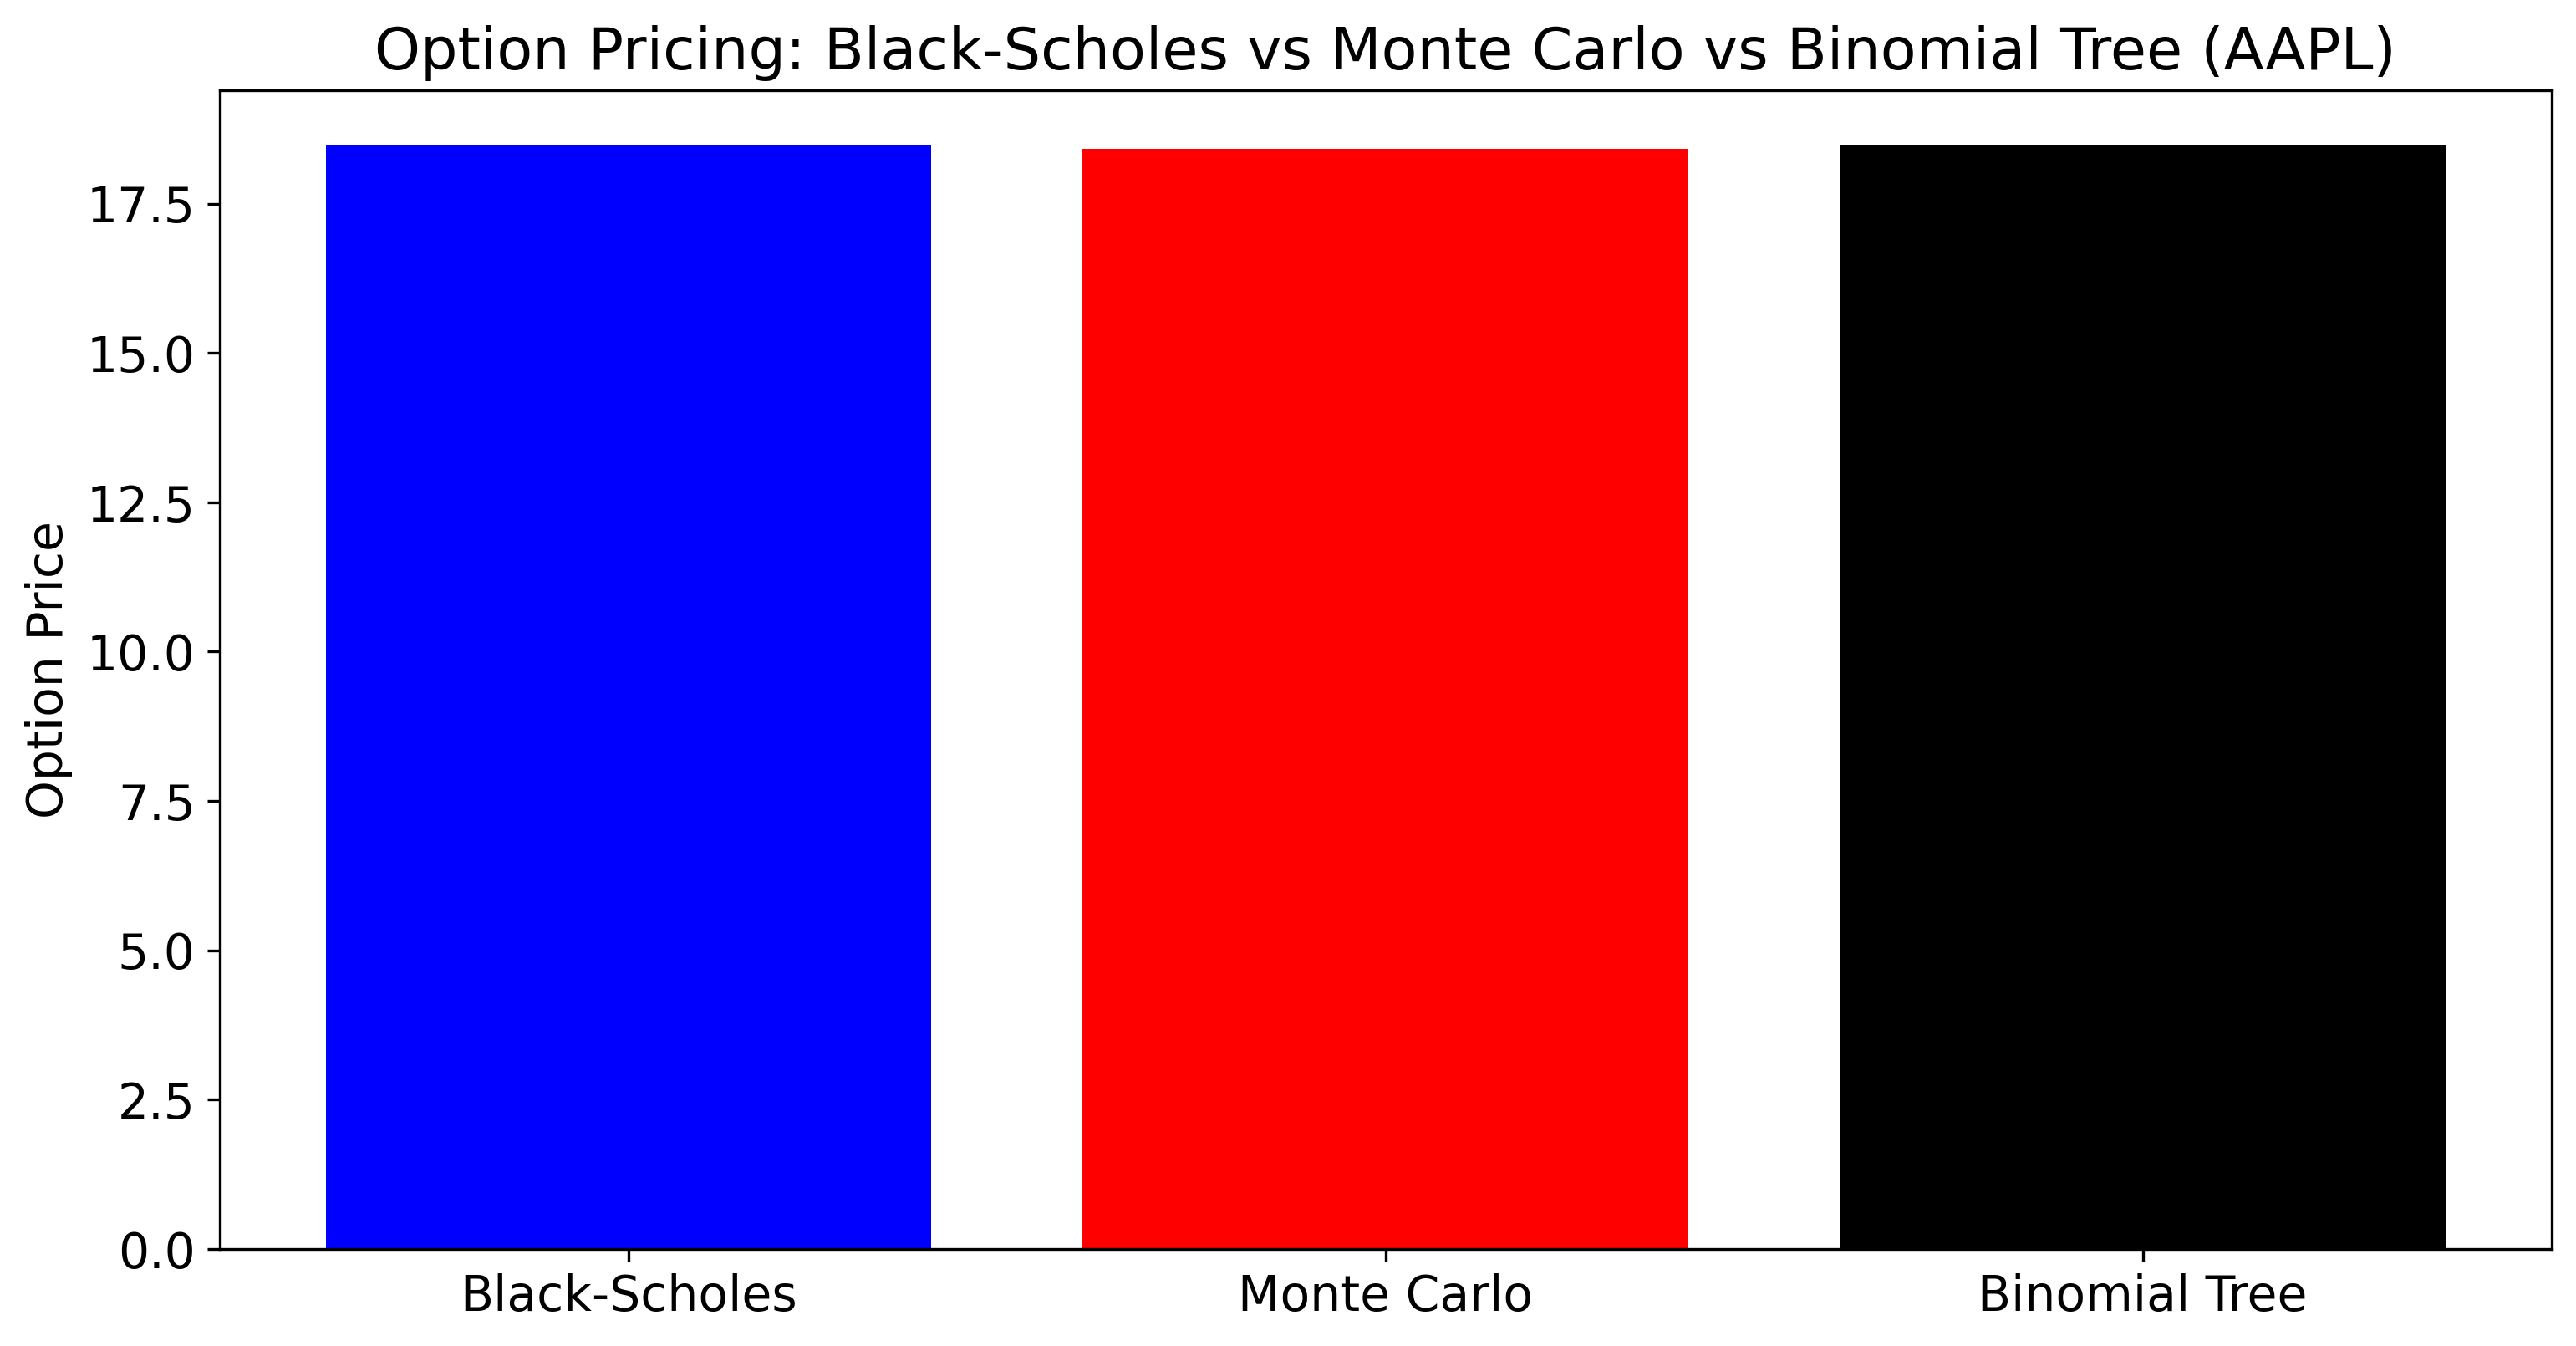

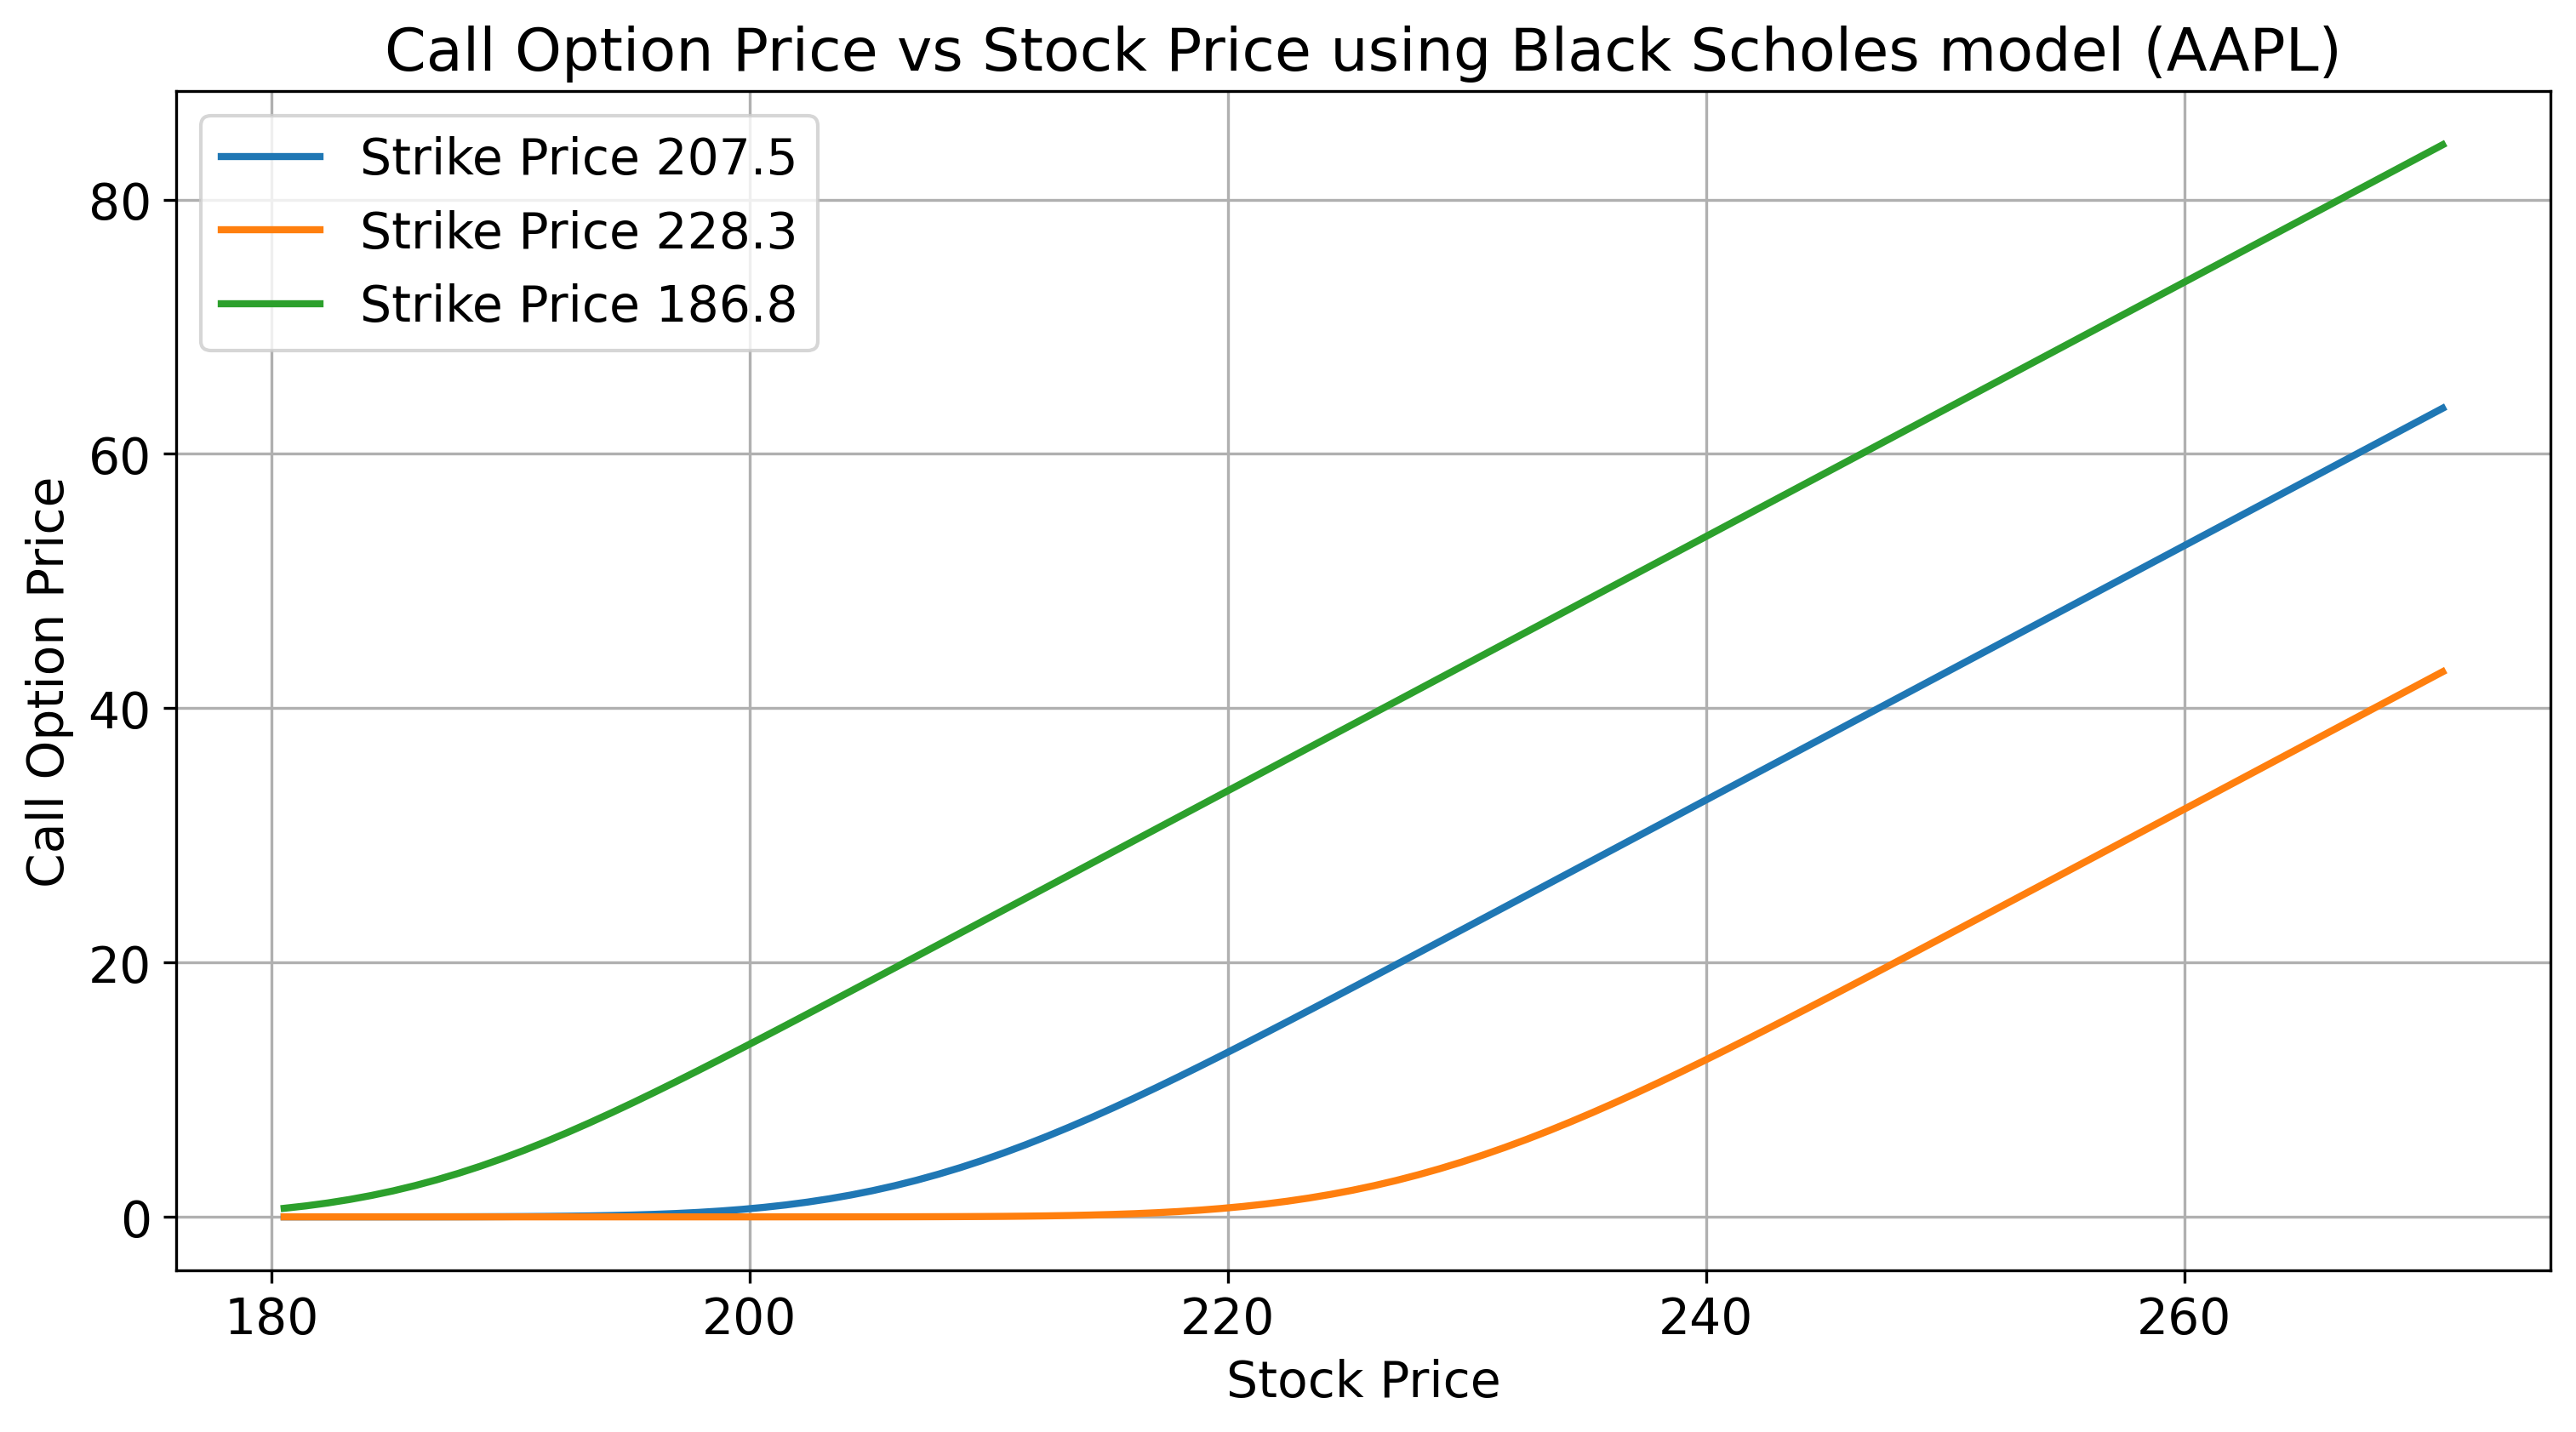

In [1]:
import os
from datetime import datetime

import pandas as pd
from data import DataHandler
from results import ResultsHandler
from greeks_volatility import GreeksVolatility
from models import OptionPricingModels
# from models import ModelType
from plots import OptionPlots
from results import ResultsHandler
from backtester import Backtester


class Main:
    def __init__(self, ticker, output_folder):
        self.ticker = ticker
        self.output_folder = output_folder
        
        # # Initialize the data handler, backtester, and report generator
        # self.data_handler = DataHandler(ticker)
        # self.greeks_volatility = GreeksVolatility()
        # self.backtester = Backtester(ticker, output_folder)
        # self.report_generator = ResultsHandler(ticker, output_folder)

    def run(self, data_file_path, n_data=None, n_each_day=5, risk_free_rate=0.05, num_steps=100, keep_first_n_rows_per_date=False):
        # Step 1: Load and preprocess the data
        self.data_handler.get_stock_data()
        # historical_volatility = self.data_handler.calculate_historical_volatility()
        
        # # Step 2: Run the backtest
        # backtest_results = self.backtester.backtest(data_file_path, n_data, n_each_day, risk_free_rate, num_steps, keep_first_n_rows_per_date)
        
        # # Step 3: Generate a report with the calculated metrics
        # for index, row in backtest_results.iterrows():
        #     # Extract required data for the report
        #     S = row['stock_price']
        #     K = row['strike']
        #     T = (pd.to_datetime(row['expiration']) - pd.to_datetime(row['date'])).days / 365  # Time to maturity
        #     sigma = row['implied_volatility']
        #     market_price = row['mid_price']
        #     bs_price = row['BS_price']
        #     delta = row['BS_delta']  # Assuming you have these calculated
        #     gamma_val = row['BS_gamma']
        #     vega_val = row['BS_vega']
        #     theta_val = row['BS_theta']
        #     rho_val = row['BS_rho']
        #     iv = row['implied_volatility']  # Assuming this is also part of your results
            
        #     # Generate report
        #     self.report_generator.generate_report(S, K, T, risk_free_rate, sigma, bs_price, delta, gamma_val, vega_val, theta_val, rho_val, iv, market_price)

if __name__ == "__main__":
    # User-defined parameters
    # Initialize the OptionPricing class
    # Initialize the OptionPricing class
    # Get the current working directory
    current_dir = os.getcwd()

    # Define the output folder path in the previous directory
    OUTPUT_FOLDER = os.path.join(os.path.dirname(current_dir), "output")

    # For historical volatility
    start_date_volatility = datetime(2023, 1, 1).strftime('%Y-%m-%d')
    end_date_volatility = datetime.today().strftime('%Y-%m-%d')

    # For Monte Carlo
    mc_num_sim = 1000
    bt_num_step = 100

    # AAPL
    ticker = "AAPL"  # Example ticker
    option_type = "call"  # Can be 'call' or 'put'
    K = 207.5  # Example strike price
    days_to_maturity = 10
    T = days_to_maturity / 365  # Time to maturity (in years)
    r = 0.05  # Example risk-free rate
    market_price = 22.25  # Example market price

    # ticker = "ABNB"  # Example ticker
    # option_type = "call"  # Can be 'call' or 'put'
    # K = 118  # Example strike price
    # days_to_maturity = 4
    # T = days_to_maturity / 365  # Time to maturity (in years)
    # r = 0.05  # Example risk-free rate
    # market_price = 11.8  # Example market price


    # Use DataHandler to fetch stock data
    data_handler = DataHandler(ticker)
    data_handler.get_stock_data()
    # Retrieve the stock price (S)
    S = data_handler.S

    # Initialize GreeksVolatility class
    greeks_volatility = GreeksVolatility(S, K, T, r, market_price, ticker, option_type, OUTPUT_FOLDER)
    # def __init__(self, K, T, r, market_price, ticker, option_type, output_folder='output'):

    # Calculate historical volatility
    historical_vol = data_handler.calculate_historical_volatility(start_date_volatility, end_date_volatility)
    print(f"Historical Volatility: {historical_vol}")

    sigma = historical_vol

    # Calculate Black-Scholes price
    models = OptionPricingModels(S, K, T, r, sigma, option_type)
        
    # bs_price = models.calculate_option(type: monte_carlo, )

    bs_price = models.black_scholes_option(q=0)
    print(f"Black-Scholes {option_type} price: {bs_price}")

    # # Calculate Monte Carlo price
    mc_price = models.monte_carlo_option_price(ticker=ticker, output_folder=OUTPUT_FOLDER, num_simulations=mc_num_sim)
    print(f"Monte Carlo {option_type} price: {mc_price[0]}")
    
    # # Calculate Binomial Tree price
    bt_price = models.binomial_tree_option_price(bt_num_step)
    print(f"Binomial Tree {option_type} price: {bt_price}")

    # ml_data_file = "../backtesting-data/Optiondataorg/AAPL_2013.csv"
    # ml_price = models.machine_learning_predict_mid_price(ml_data_file)
    # print(f"Machine Learning {option_type} price: {ml_price}")

    # Generate comparative pricing plot
    plots = OptionPlots(option_type, ticker, OUTPUT_FOLDER)
    plots.comparative_pricing_plot(bs_price, mc_price, bt_price)

    # Calculate Greeks
    delta, gamma, vega, theta, rho = greeks_volatility._greeks(sigma)
    print(f"Greeks: Delta={delta}, Gamma={gamma}, Vega={vega}, Theta={theta}, Rho={rho}")
    implied_vol = greeks_volatility.implied_volatility()

    # Generate report
    results_handler = ResultsHandler(ticker, OUTPUT_FOLDER, S, K, T, r, sigma, option_type, delta, gamma, vega, theta, rho, implied_vol, market_price, bs_price, mc_price[0], bt_price, start_date_volatility, end_date_volatility)
    results_handler.generate_report()

    # Plot option prices vs stock price
    option_plots = OptionPlots(option_type, ticker, OUTPUT_FOLDER)
    option_plots.plot_option_price_vs_stock_price(S, K, T, r, sigma)


    # file_path = 'backtesting-data/Optiondataorg/AAPL_2013.csv'
    # backtester = Backtester(ticker, OUTPUT_FOLDER)
    # backtest_results = backtester.backtest(file_path, n_each_day = 1, keep_first_n_rows_per_date=True)

In [2]:
# print(S, K, T, r, sigma, option_type)

# ml_data_file = "../backtesting-data/Optiondataorg/AAPL_2013.csv"
# # S = 549.  # Example stock price
# # K = 400.0  # Example strike price
# # T = 0.0054  # Time to maturity (in years)
# # r = 0.05  # Example risk-free rate 
# # sigma = 0.35
# # option_type = 'call'
# print(S, K, T, r, sigma, option_type)
# models = OptionPricingModels(S, K, T, r, sigma, option_type)
# ml_price = models.machine_learning_predict_mid_price(ml_data_file)
# print(f"Machine Learning {option_type} price: {ml_price}")

Machine Learning Model MSE: 64.21462618201731


,date,act_symbol,expiration,strike,call_put,bid,ask,implied_volatility,delta,gamma,theta,vega,stock_price,T,mid_price,risk_free_rate,BS_price,BT_price,MC_price,ML_price
0,2013-01-02,AAPL,2013-01-04,400.0,call,146.9,150.60,0.3726,1.0000,0.0000,-1.2112,0.0000,549.029976,0.005479,148.750,0.05,149.139550,149.139550,148.736588,146.317000
1,2013-01-15,AAPL,2013-01-25,640.0,put,153.6,155.70,0.6985,-0.9920,0.0004,-21.3152,1.7017,485.920013,0.027397,154.650,0.05,153.395190,153.386780,153.686331,146.042850
2,2013-03-18,AAPL,2015-01-17,690.0,put,263.0,265.15,0.3081,-0.7762,0.0014,-19.2985,163.1256,455.720016,1.835616,264.075,0.05,201.551360,201.343377,200.843906,265.727857
3,2013-03-19,AAPL,2013-03-22,320.0,call,133.8,135.25,0.4184,1.0000,0.0000,-0.9021,0.0000,454.489975,0.008219,134.525,0.05,134.621455,134.621455,134.640859,131.856000


Black-Scholes MAE: 16.066113670218606, RMSE: 31.268758926724363
Binomial Tree MAE: 16.12021202653966, RMSE: 31.37281208122328
Monte Carlo MAE: 16.081008379838543, RMSE: 31.61927227963639
Machine Learning MAE: 3.8405017857144657, RMSE: 4.739673455450268


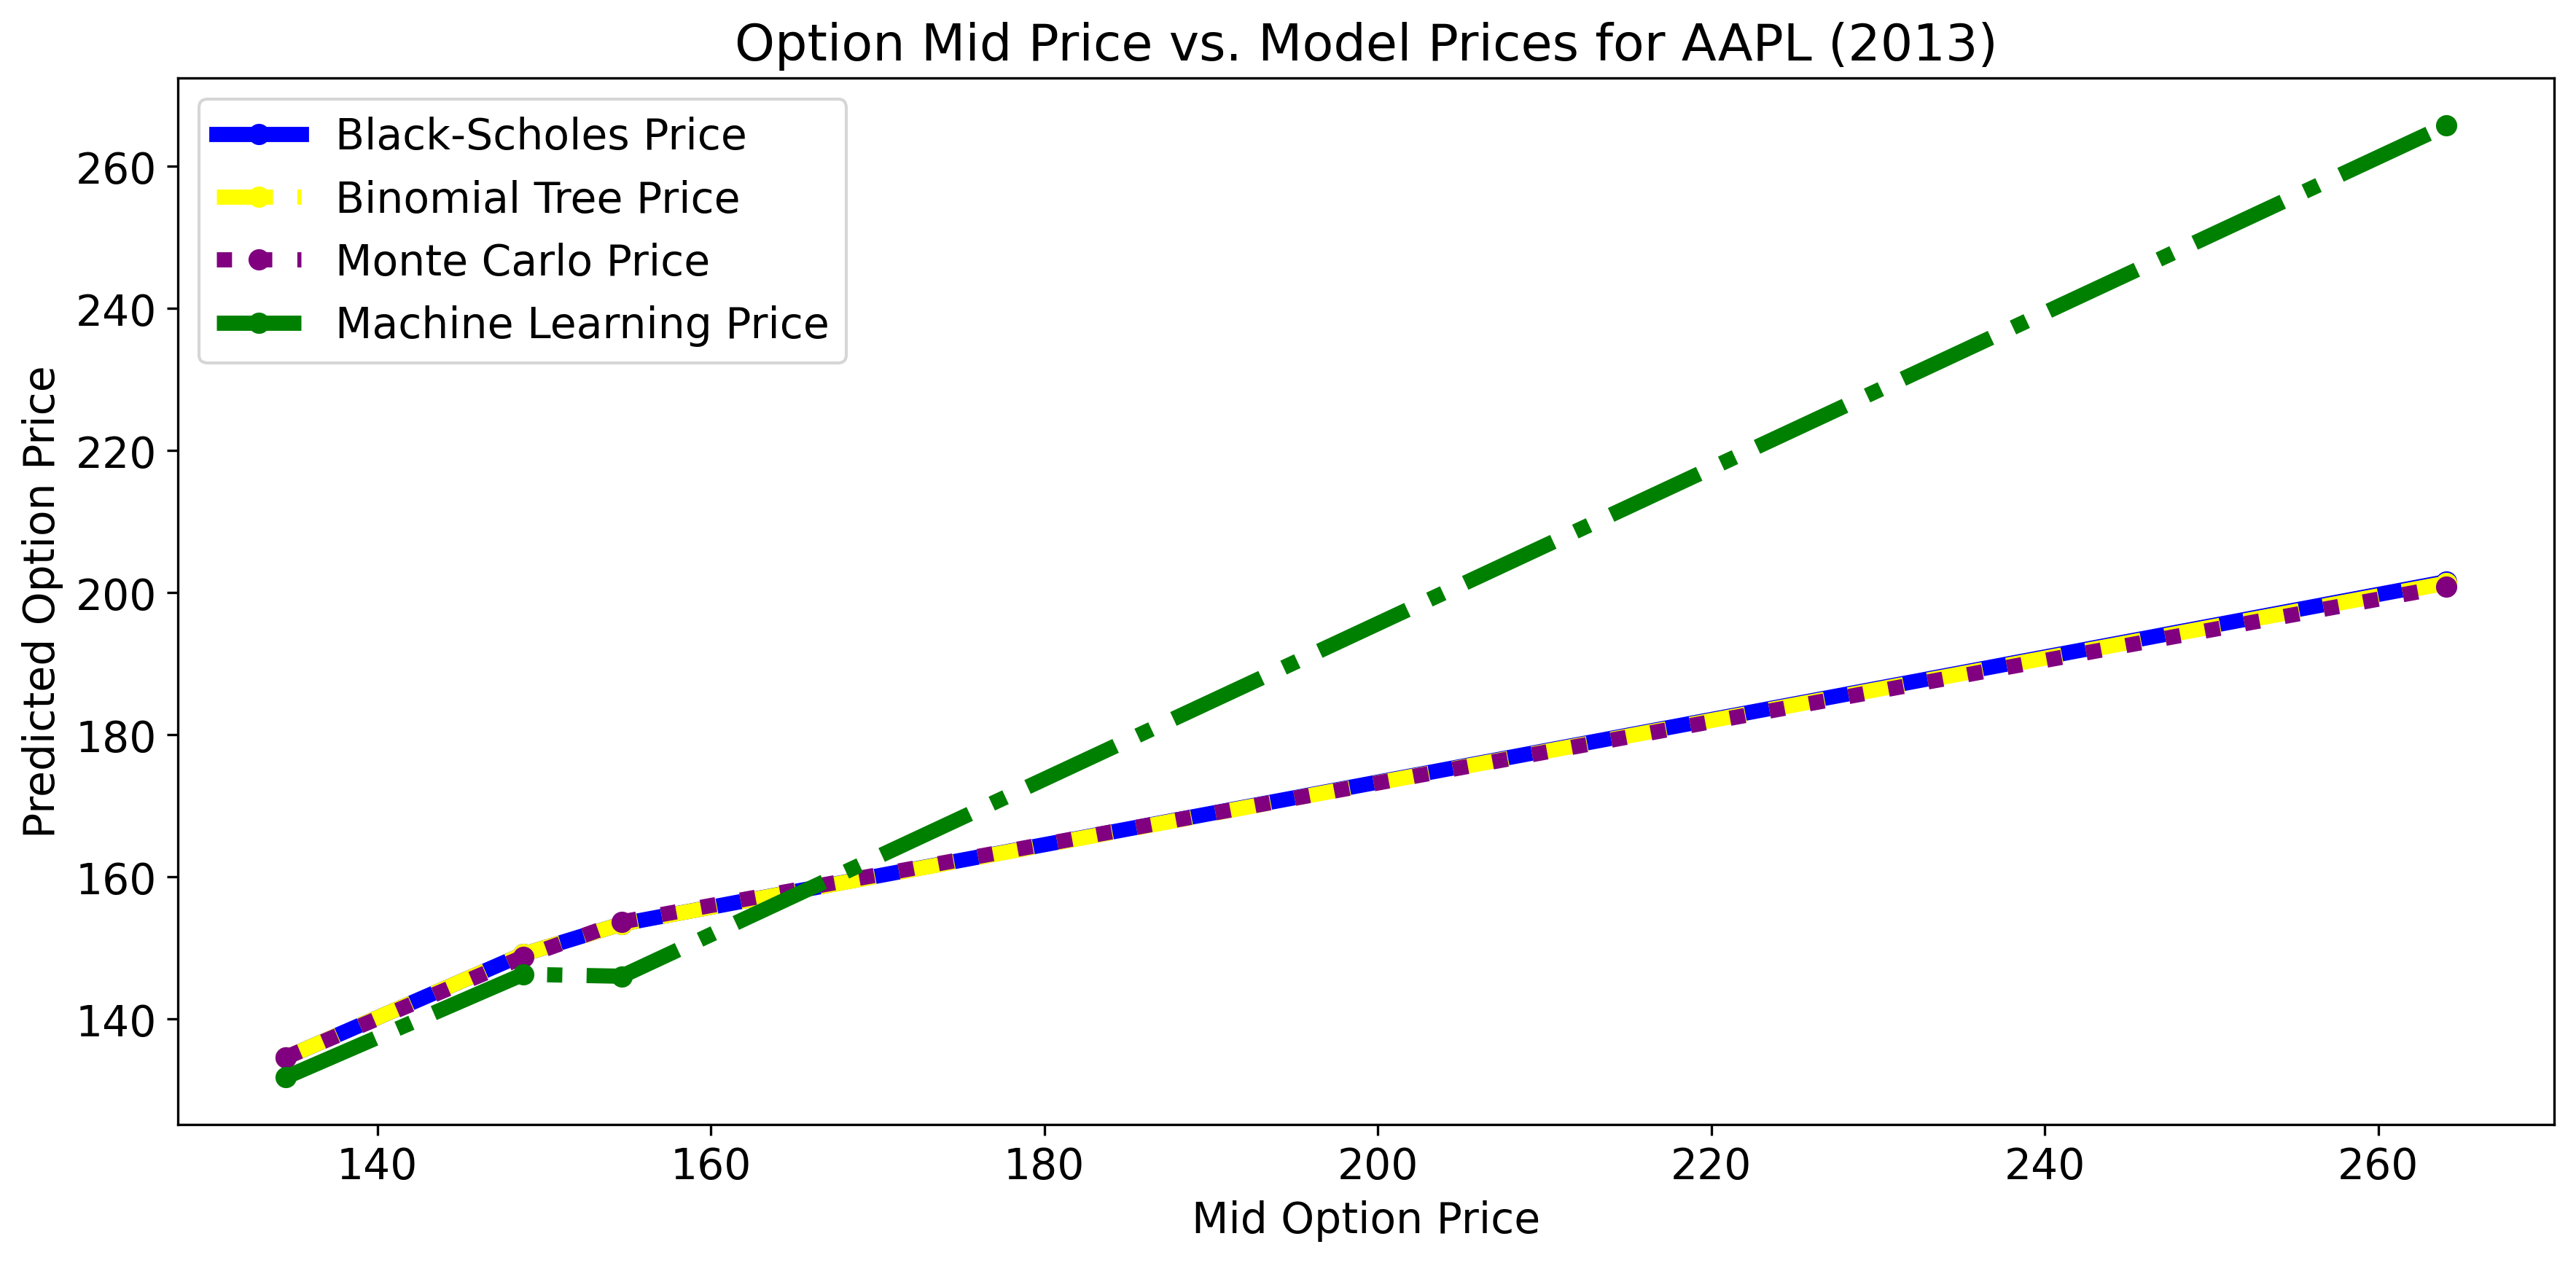

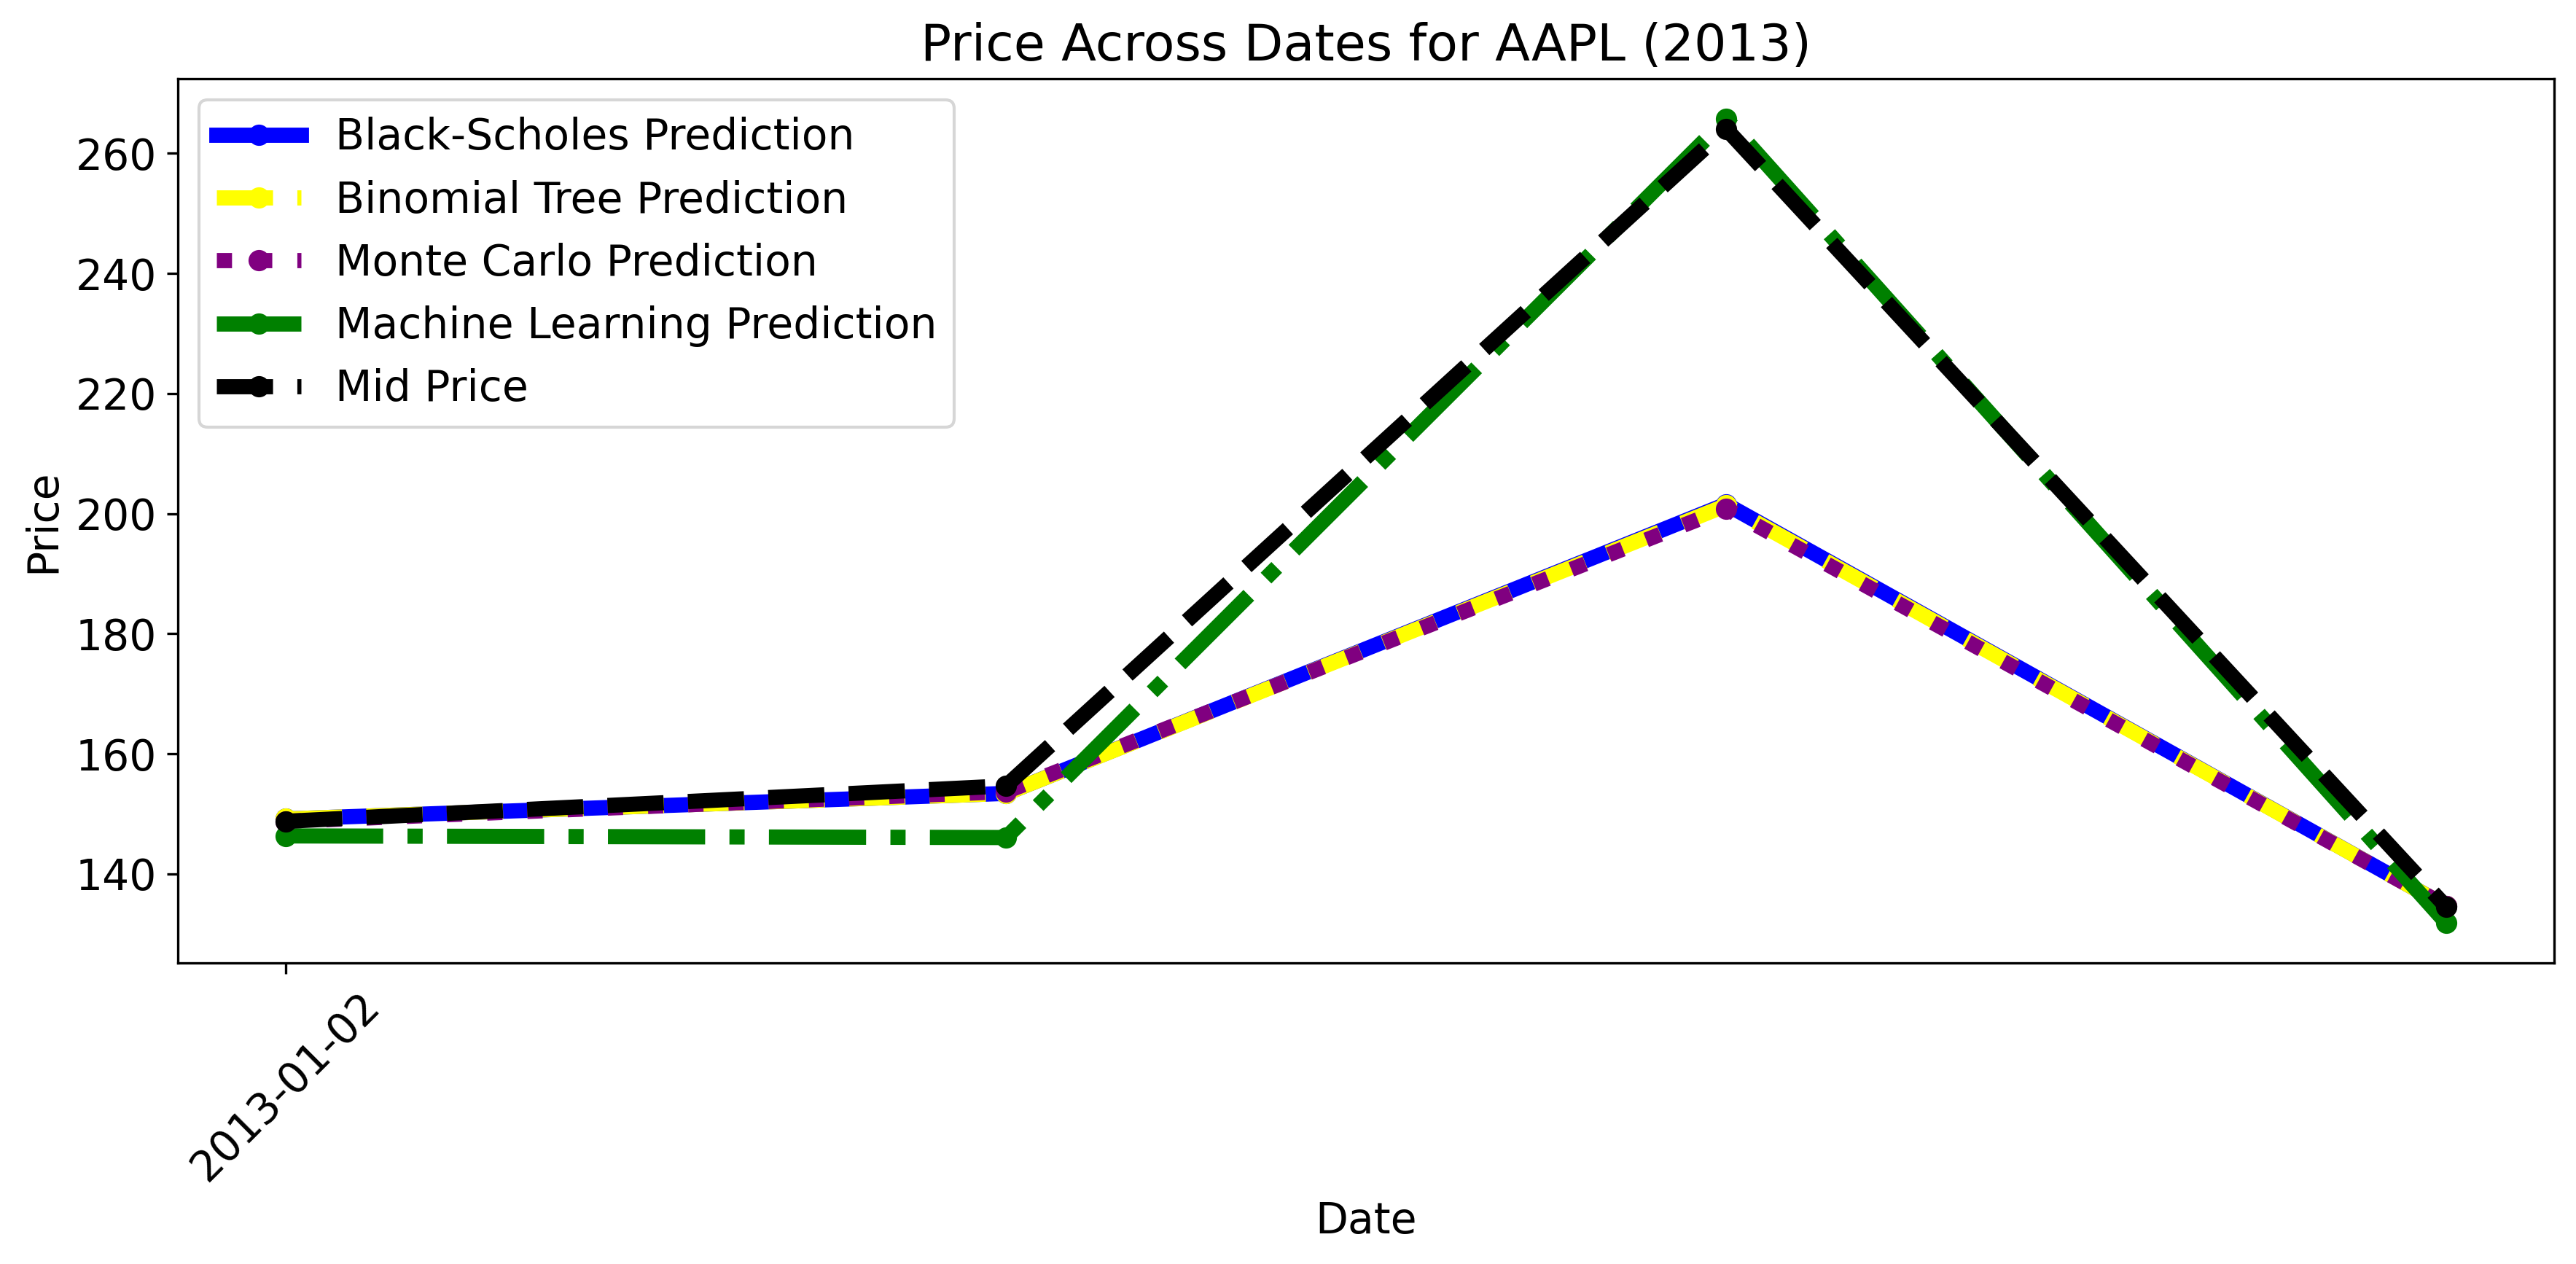

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from data import DataHandler
from results import ResultsHandler
from greeks_volatility import GreeksVolatility
from models import OptionPricingModels
# from models import ModelType
from plots import OptionPlots
from results import ResultsHandler
from backtester import Backtester

current_dir = os.getcwd()

# Define the output folder path in the previous directory
OUTPUT_FOLDER = os.path.join(os.path.dirname(current_dir), "output")

ticker = 'AAPL'
file_path = '../backtesting-data/Optiondataorg/AAPL_2013.csv'
backtester = Backtester(ticker, OUTPUT_FOLDER)


# # dt = 1 / 365  # Daily steps
# T = [0.00547945, 0.02739726, 1.83561644, 0.00821918]
# # print(T,'hi')
# # # Convert T to a numpy array for element-wise operations
# T_array = np.array(T)

# # # Calculate number of steps for each option
# num_steps = (T_array * 365).astype(int)  # Number of days until maturity
# # print(num_steps, 'hi')
# sigma = [0.3726, 0.6985, 0.3081, 0.4184]
# r= 0.05
# dt = 1 / 365  # Daily steps
# S = [549.029976, 485.920013, 455.720016, 454.489975]
# # num_steps = (T * 365).astype(int)  # Number of days until maturity
# payoffs = np.zeros(len(S))  # Array to store payoffs for each option
# paths = []  # List to store paths for each simulation

# # Loop through the number of simulations
# for _ in range(10):
#     ST = np.copy(S)  # Current stock price for this simulation
#     path = [ST.copy()]  # Store the path for this simulation
#     for idx in range(len(S)):
#         for step in range(num_steps[idx]):  # Use the number of steps for the specific option
#             Z = np.random.normal()  # Generate a random normal value for this step
#             ST[idx] *= np.exp((r - 0.5 * sigma[idx] ** 2) * dt + sigma[idx] * np.sqrt(dt) * Z)


# for _ in range(10000):
#     ST = self.S
#     path = [self.S]
backtest_results = backtester.backtest(file_path, n_each_day = 1, keep_first_n_rows_per_date=True)

In [2]:
backtest_results

,date,act_symbol,expiration,strike,call_put,bid,ask,implied_volatility,delta,gamma,theta,vega,stock_price,T,BS_price,BT_price,MC_price
0,2013-01-02,AAPL,2013-01-04,400.0,call,146.9,150.60,0.3726,1.0000,0.0000,-1.2112,0.0000,549.029976,0.005479,149.139550,149.139550,149.126463
1,2013-01-15,AAPL,2013-01-25,640.0,put,153.6,155.70,0.6985,-0.9920,0.0004,-21.3152,1.7017,485.920013,0.027397,153.395190,153.386780,153.910651
2,2013-03-18,AAPL,2015-01-17,690.0,put,263.0,265.15,0.3081,-0.7762,0.0014,-19.2985,163.1256,455.720016,1.835616,201.551360,201.343377,202.194877
3,2013-03-19,AAPL,2013-03-22,320.0,call,133.8,135.25,0.4184,1.0000,0.0000,-0.9021,0.0000,454.489975,0.008219,134.621455,134.621455,134.750451
